# DAP 1. kisházifeladat
## Beadási határidő: 2021. 03. 08.

Egy áruház adatain fogunk dolgozni. A cél, hogy megtippeljük, hogy melyik országból származhatnak az adatok. Ha elvégzed a lenti feladatokat, akkor jó esélyed van rá, hogy a végén megtaláld a választ.

_! A pont nem az ország megtippelésére jár, hanem a részfeladatokra! Ha nem találod meg az országot, akkor is kaphatsz maximális pontszámot._


------------------

### Szükséges csomagok beolvasása

In [309]:
import pandas as pd
import matplotlib.pyplot as plt

### -- Adj címet a szekciónak! --

In [310]:
df = pd.read_csv('../data/Dataset20210219.csv', sep=';') #df: DataFrame


In [311]:
# első sorok megjelenítése
df.head()

,customer_id,visit_date,visit_spend,daynum
0,2,2010-04-01,5.97,0
1,2,2010-04-06,12.71,5
2,2,2010-04-07,34.52,6
3,2,2010-04-12,7.89,11
4,2,2010-04-14,17.17,13


In [312]:
df.head(3)

,customer_id,visit_date,visit_spend,daynum
0,2,2010-04-01,5.97,0
1,2,2010-04-06,12.71,5
2,2,2010-04-07,34.52,6


In [313]:
# utolsó sorok megjelenítése
df.tail(6)

,customer_id,visit_date,visit_spend,daynum
596727,7376,2011-05-14,24.71,408
596728,7376,2011-05-15,4.86,409
596729,7376,2011-05-24,56.55,418
596730,7376,2011-05-26,60.25,420
596731,7376,2011-06-09,159.15,434
596732,7376,2011-06-19,5.98,444


In [314]:
df['customer_id']

0            2
1            2
2            2
3            2
4            2
          ... 
596728    7376
596729    7376
596730    7376
596731    7376
596732    7376
Name: customer_id, Length: 596733, dtype: int64

In [315]:
df[['customer_id', 'visit_date']]

,customer_id,visit_date
0,2,2010-04-01
1,2,2010-04-06
2,2,2010-04-07
3,2,2010-04-12
4,2,2010-04-14
...,...,...
596728,7376,2011-05-15
596729,7376,2011-05-24
596730,7376,2011-05-26
596731,7376,2011-06-09


-- _Mi a dataframe típusa?_ -- \
-- _Mi a dataframe egy oszlopának a típusa?_ --

In [316]:
type(df)
# DataFrame típusa = pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

In [317]:
type(df['customer_id'])
# DataFrame egy oszlopának típusa = pandas.core.series.Series

pandas.core.series.Series

-- _Hány sorból áll (milyen hossú) az adathalmaz?_ --

In [318]:
df.shape[0]
# 596733 sor

596733

-- _Röviden értelmezd a következő két szekciót!_ --

In [319]:
# maximális költés
df['visit_spend'].max()
# A DataFrame 'visit_spend' oszlopában található értékek közül a legnagyobbat adja vissza a függvény.
# Ez a legnagyobb összeg, amit valaki egy alkalommal elköltött az áruházban.

1234.0

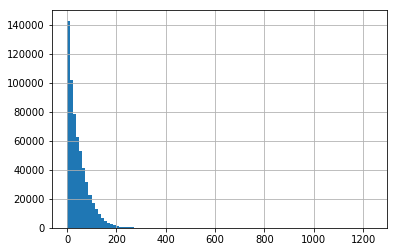

In [320]:
df['visit_spend'].hist(bins=100)
# A DataFrame 'visit_spend' oszlopában található értékek eloszlását ábrázolja.
# Az látható, hogy a kisebb összegű vásárlások sokkal gyakoribbak.

-- _Hány egyedi customer\_id-t tartalmaz az adathalmaz?_ --

In [321]:
#tipp: unique()
df['customer_id'].nunique()
# 5000 db

5000

In [322]:
#szűrés
cond = df['visit_spend']>1000
df[cond]

,customer_id,visit_date,visit_spend,daynum
250905,3232,2011-05-31,1234.00,425
476027,5905,2010-09-17,1177.94,169


-- _Röviden értelmezd a következő két szekciót!_ --

In [323]:
df['pelda_datum'] = df['visit_date']*2
df.head()
# Hozzáad egy új 'pelda_datum' oszlopot a DataFrame-hez, amit a 'visit_date' oszlopból vezet le úgy,
# hogy elemenként megkétszerezi a 'visit_date' értékeit. Mivel ezek stringek, ezért az új érték
# az eredeti érték kétszer egymás után írva.

,customer_id,visit_date,visit_spend,daynum,pelda_datum
0,2,2010-04-01,5.97,0,2010-04-012010-04-01
1,2,2010-04-06,12.71,5,2010-04-062010-04-06
2,2,2010-04-07,34.52,6,2010-04-072010-04-07
3,2,2010-04-12,7.89,11,2010-04-122010-04-12
4,2,2010-04-14,17.17,13,2010-04-142010-04-14


In [324]:
del df['pelda_datum']
df.head()
# Törli az előbb hozzáadott 'pelda_datum' oszlopot a DataFrame-ből.

,customer_id,visit_date,visit_spend,daynum
0,2,2010-04-01,5.97,0
1,2,2010-04-06,12.71,5
2,2,2010-04-07,34.52,6
3,2,2010-04-12,7.89,11
4,2,2010-04-14,17.17,13


## Melyik napon vásárolnak a legnagyobb értékben?

### A hét melyik napja van?

-- _A daynum változó megadja, hogy az adathalmazban hányadik napra esik az adott vásárlás. Az indexelés 0-tól kezdődik. Ez alapján hozz létre egy új oszlopot (day\_of\_week), ami 0-tól 6-ig indexeli a hét napjait. (0: hétfő, 1: kedd, stb.)_ --

In [325]:
#tipp: modulo (%)
df['day_of_week'] = (df['daynum'] + 3) % 7
df
# A 0-ás daynum értékhez tartozó elem egy 2010-04-01 dátumú vásárlás, ami csütörtök volt, ezért 3-al el
# kell csúsztatni a modulo számolást.

,customer_id,visit_date,visit_spend,daynum,day_of_week
0,2,2010-04-01,5.97,0,3
1,2,2010-04-06,12.71,5,1
2,2,2010-04-07,34.52,6,2
3,2,2010-04-12,7.89,11,0
4,2,2010-04-14,17.17,13,2
...,...,...,...,...,...
596728,7376,2011-05-15,4.86,409,6
596729,7376,2011-05-24,56.55,418,1
596730,7376,2011-05-26,60.25,420,3
596731,7376,2011-06-09,159.15,434,3


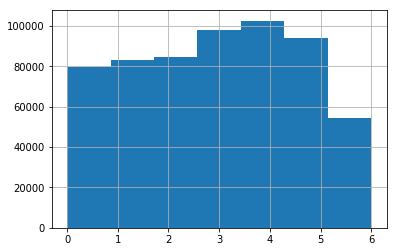

In [326]:
df['day_of_week'].hist(bins=7)

-- _Melyik napon költöttek a legtöbbet összesen?_ --

In [327]:
spend_by_day_of_week = df.groupby(['day_of_week'], as_index = False).agg({'visit_spend': 'sum'})
print(spend_by_day_of_week)
print('\n{}'.format(spend_by_day_of_week['visit_spend'].idxmax()))
# Pénteken

   day_of_week  visit_spend
0            0   3131751.41
1            1   3247763.71
2            2   3458215.31
3            3   4726884.89
4            4   5293651.86
5            5   4772753.94
6            6   2197912.88

4


In [328]:
# Vagy ha ez a kérdés
spend_by_day = df.groupby(['visit_date'], as_index=False).agg({'visit_spend': 'sum'})
print(spend_by_day)
print('\n{}'.format(spend_by_day.loc[spend_by_day['visit_spend'].idxmax()]['visit_date']))
# 2010.12.22-én

     visit_date  visit_spend
0    2010-04-01    102625.86
1    2010-04-02     82660.90
2    2010-04-03     78081.71
3    2010-04-04      4411.05
4    2010-04-05     38144.77
..          ...          ...
439  2011-06-15     51252.38
440  2011-06-16     68920.34
441  2011-06-17     80762.94
442  2011-06-18     81009.66
443  2011-06-19     33933.16

[444 rows x 2 columns]

2010-12-22


## Aggregálás és összefűzés

In [329]:
stat = df.groupby(['day_of_week'], as_index=False).agg({'visit_spend':'sum'})
stat

,day_of_week,visit_spend
0,0,3131751.41
1,1,3247763.71
2,2,3458215.31
3,3,4726884.89
4,4,5293651.86
5,5,4772753.94
6,6,2197912.88


-- _Töltsd ki magyarul a címet és a tengelyfeliratot!_ --

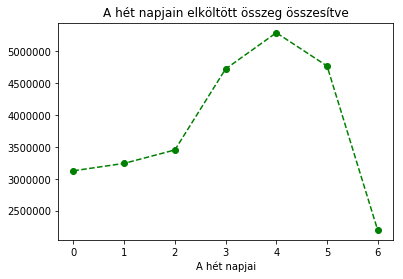

In [330]:
plt.title('A hét napjain elköltött összeg összesítve')
plt.xlabel('A hét napjai')
plt.plot(stat['day_of_week'], stat['visit_spend'], 'g--', marker='o')

-- _Egészítsd ki az alábbi kódot úgy, hogy a dátum is benne legyen a stat változó oszlopai közt!_ -- 

In [331]:
stat = df.groupby(['daynum', 'visit_date'], as_index=False).agg({'visit_spend':'sum'})
stat

,daynum,visit_date,visit_spend
0,0,2010-04-01,102625.86
1,1,2010-04-02,82660.90
2,2,2010-04-03,78081.71
3,3,2010-04-04,4411.05
4,4,2010-04-05,38144.77
...,...,...,...
439,440,2011-06-15,51252.38
440,441,2011-06-16,68920.34
441,442,2011-06-17,80762.94
442,443,2011-06-18,81009.66


-- _Ábrázold a teljes napi költést a napok függvényében (daynum)!_ --

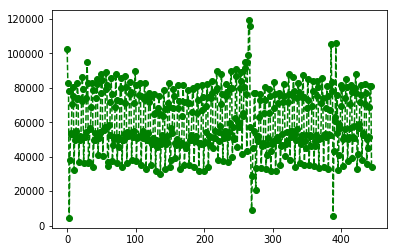

In [332]:
plt.plot(stat['daynum'], stat['visit_spend'], 'g--', marker='o')

-- _Nagyíts bele a plotba, figyeld meg a 250. és a 300. nap közötti költéseket! (A nagyítást mi előre megírtuk, neked már csak ábrázolnod kell.)_ --

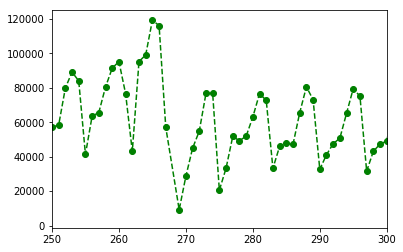

In [333]:
plt.xlim(250,300)
plt.plot(stat['daynum'], stat['visit_spend'], 'g--', marker='o')

-- _Egy mondatban foglald össze a látottakat!_ --

Itt is megfigyelhető a hét napjain elköltött összeg ingadozása: korábbról tudjuk, hogy pénteken költötték a legtöbbet vasárnap pedig a legkevesebbet. A lokális maximumok valószínűleg pénteki napoknak, a lokális minimumok pedig vasárnapi napoknak felelnek meg. Egy másik érdekesség látható a 260-270 napok között, ami karácsonynak felel meg. Karácsony előtt emelkedett az elköltött összeg, majd karácsony alatt nagyot csökkent.

## Adott napi átlagos költéstől való eltérés

In [334]:
stat.head()

,daynum,visit_date,visit_spend
0,0,2010-04-01,102625.86
1,1,2010-04-02,82660.90
2,2,2010-04-03,78081.71
3,3,2010-04-04,4411.05
4,4,2010-04-05,38144.77


In [335]:
# oszlopok újranevezése
stat.columns=['daynum', 'visit_date', 'daily_total']
stat.head()

,daynum,visit_date,daily_total
0,0,2010-04-01,102625.86
1,1,2010-04-02,82660.90
2,2,2010-04-03,78081.71
3,3,2010-04-04,4411.05
4,4,2010-04-05,38144.77


-- _Mi történik az alábbi szekcióban?_ --

In [336]:
max_spending = stat['daily_total'].max()
# A max_spending változóba eltároljuk az egy napon elköltött maximális összeget.

-- _Számold ki újra a day\_of\_week változót a stat dataframeben!_ --

In [337]:
stat['day_of_week'] = (stat['daynum'] + 3) % 7

-- 
* _Hozz létre egy új változót (daily_stat), ami tartalmazza a hét napjait (day_of_week) és az adott napra jellemző költés átlagát!_ 
* _Nevezd át az új változó oszlopait a következőkre: day_of_week, daily_avg!_

--

In [338]:
#tipp: aggregálj, számolj átlagot (mean)
daily_stat = stat.groupby(['day_of_week'], as_index=False).agg({'daily_total': 'mean'})
daily_stat.columns = ['day_of_week', 'daily_avg']
daily_stat

,day_of_week,daily_avg
0,0,49710.339841
1,1,51551.804921
2,2,54892.306508
3,3,73857.576406
4,4,82713.310313
5,5,75757.999048
6,6,34342.388750


-- _Mi történik az alábbi szekcióban?_ --

In [339]:
merged_df = stat.merge(daily_stat,on='day_of_week',how='left')
merged_df.head()
# A stat DataFrame soraihoz illesztjük a daily_stat DataFrame azon sorait, ahol a day_of_week oszlop értéke megegyezik.

,daynum,visit_date,daily_total,day_of_week,daily_avg
0,0,2010-04-01,102625.86,3,73857.576406
1,1,2010-04-02,82660.90,4,82713.310313
2,2,2010-04-03,78081.71,5,75757.999048
3,3,2010-04-04,4411.05,6,34342.388750
4,4,2010-04-05,38144.77,0,49710.339841


-- _Számíts új oszlopot (deviation), ami a napi összes költés és a napi átlag hányadosát tartalmazza!_ --

In [340]:
merged_df['deviation'] = merged_df['daily_total'] / merged_df['daily_avg']

In [341]:
merged_df.sort_values('deviation')

,daynum,visit_date,daily_total,day_of_week,daily_avg,deviation
3,3,2010-04-04,4411.05,6,34342.388750,0.128443
387,388,2011-04-24,5278.59,6,34342.388750,0.153705
268,269,2010-12-26,9175.91,6,34342.388750,0.267189
274,275,2011-01-01,20511.14,5,75757.999048,0.270746
269,270,2010-12-27,28588.18,0,49710.339841,0.575095
...,...,...,...,...,...,...
258,258,2010-12-15,80478.58,2,54892.306508,1.466118
266,266,2010-12-23,116126.64,3,73857.576406,1.572305
263,263,2010-12-20,95236.41,0,49710.339841,1.915827
264,264,2010-12-21,99082.84,1,51551.804921,1.922005


## Eredmények kiértékelése

-- _Futtasd le a maradék programkódot és gondold végig, hogy milyen események befolyásolhatták a költési kedv kiugró változásait! Írj le minden érdekességet, amit észreveszel!_ -- 
#tipp: az egész világháló a rendelkezésedre áll

In [342]:
import calendar
from dateutil.parser import parse

In [343]:
def get_week_day(x):
    return calendar.day_name[parse(x).weekday()]

In [344]:
merged_df['day_name'] = merged_df['visit_date'].apply(get_week_day)

In [345]:
merged_df.sort_values('deviation')

,daynum,visit_date,daily_total,day_of_week,daily_avg,deviation,day_name
3,3,2010-04-04,4411.05,6,34342.388750,0.128443,Sunday
387,388,2011-04-24,5278.59,6,34342.388750,0.153705,Sunday
268,269,2010-12-26,9175.91,6,34342.388750,0.267189,Sunday
274,275,2011-01-01,20511.14,5,75757.999048,0.270746,Saturday
269,270,2010-12-27,28588.18,0,49710.339841,0.575095,Monday
...,...,...,...,...,...,...,...
258,258,2010-12-15,80478.58,2,54892.306508,1.466118,Wednesday
266,266,2010-12-23,116126.64,3,73857.576406,1.572305,Thursday
263,263,2010-12-20,95236.41,0,49710.339841,1.915827,Monday
264,264,2010-12-21,99082.84,1,51551.804921,1.922005,Tuesday


In [346]:
df.head()

,customer_id,visit_date,visit_spend,daynum,day_of_week
0,2,2010-04-01,5.97,0,3
1,2,2010-04-06,12.71,5,1
2,2,2010-04-07,34.52,6,2
3,2,2010-04-12,7.89,11,0
4,2,2010-04-14,17.17,13,2


Látható, hogy az átlagtól pozitív irányba történő legnagyobb eltérések a karácsony előtti napokban vannak. Ilyenkor volt, hogy több, mint 2-szer annyit költöttek, mint az átlag. Ez az ünnepekre való készülésnek tudható be, olyan országról van szó, ahol ünneplik a karácsonyt.

Az átlagtól negatív irányba való legnagyobb eltérések pedig karácsony után két ünnep között, újévkor és húsvétkor (2010.04.04.) vannak. Ez megint egy keresztény országra utal.

A 'visit_spend'-ben szereplő értékek alapján valamilyen erős valutát (euró, dollár, font, frank stb.) használó országról van szó.

Korábbról tudjuk, hogy vasárnap nagyon keveset költenek a többi naphoz képest, a boltok többsége valószínűleg zárva tart ilyenkor.

Németország.